В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
cars_df = pd.read_csv("drive/MyDrive/ML Course/cars.csv")

In [79]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [80]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.select_dtypes

In [81]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [82]:
cars_df.select_dtypes(include='object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [83]:
cars_df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

В наборі даних 100 записів.

З них:
- 8 числових колонок: `Car_ID`, `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`, `Price`
- 5 категоріальних: `Brand`, `Model`, `Fuel_Type`, `Transmission`, `Owner_Type`

Аналіз по категоріальним значенням показав що в датафреймі у нас:
- 2 колонки мультикатегоріальні значення без порядку.
- 1 колонка мультикатегоріальна з порядком.
- 2 бінарни колонки.

Більш детальніше по категоріальним колонкам:

- `Brand`, `Model` - мультикатегоріальні значення без порядку.

- `Owner_Type` - мультикатегоріальне значення з порядком - `First` > `Second` > `Third`.

- `Fuel_Type` - бінарне, має значення або `Petrol` або `Diesel`.

- `Transmission` - бінарне, має значення або `Manual` або `Automatic`.


**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [84]:
inputs, targets = cars_df.drop('Price', axis=1), cars_df['Price']

In [85]:
inputs.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5


In [86]:
targets

,Price
0,800000
1,1000000
2,2500000
3,600000
4,850000
...,...
95,2900000
96,1400000
97,750000
98,850000


In [87]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

## Колонки `Fuel_type` та `Transmission`

In [88]:
def entityProportion(df, category):
  category_type_counts = df[category].value_counts()

  most_common_category_type = category_type_counts.index[0]
  most_common_category_type_count = category_type_counts.iloc[0]

  print(f"\nНайпоширеніший тип в категорії {category}: {most_common_category_type} ({most_common_category_type_count})")

In [89]:
entityProportion(X_train, 'Fuel_Type')
entityProportion(X_test, 'Fuel_Type')


Найпоширеніший тип в категорії Fuel_Type: Petrol (41)

Найпоширеніший тип в категорії Fuel_Type: Petrol (11)


<Axes: xlabel='Fuel_Type', ylabel='count'>

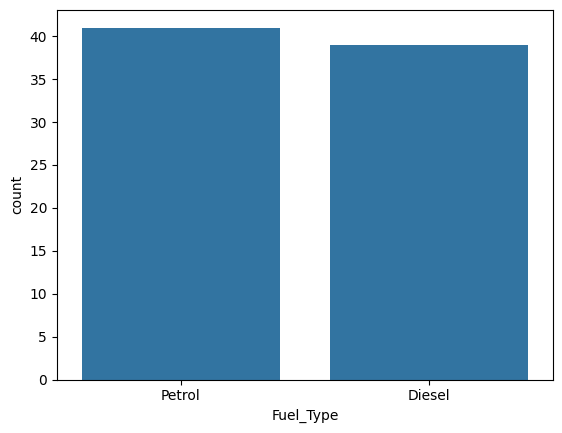

In [90]:
sns.countplot(data=X_train, x='Fuel_Type')

In [91]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['fuel_type_codes'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['fuel_type_codes'] = X_test.Fuel_Type.map(fuel_type_codes)

In [92]:
entityProportion(X_train, 'Transmission')
entityProportion(X_test, 'Transmission')


Найпоширеніший тип в категорії Transmission: Automatic (49)

Найпоширеніший тип в категорії Transmission: Manual (12)


<Axes: xlabel='Transmission', ylabel='count'>

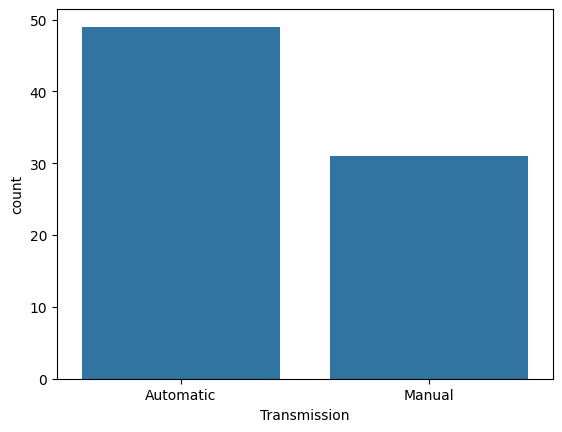

In [93]:
sns.countplot(data=X_train, x='Transmission')

In [94]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['transmission_codes'] = X_test.Transmission.map(transmission_codes)

In [95]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1


In [96]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0


## Колонка `Brand`

In [97]:
column_to_encode = 'Brand'

In [98]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[[column_to_encode]])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [99]:
one_hot_train = enc.transform(X_train[[column_to_encode]]).toarray()
one_hot_test = enc.transform(X_test[[column_to_encode]]).toarray()

In [100]:
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test

In [101]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Колонка `Owner_Type`

In [102]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

## Колонка `Model`

In [103]:
X_test.Model

,Model
17,Q3
41,Santro
92,Vento
14,Ertiga
68,Aspire
31,Elantra
89,Venue
15,City
21,Figo
60,Verna


Як я бачу це, то можливо можна проаналізувати моделі автомобілів і розпредилити їх в зовсім нову категорію "Тип кузова", де в нас можуть бути категорії на кшталт "Седан", "Кросовер", "Мінівен", "Купе".
Поки не знаю як це реалізувати з мінінмізацією ручного вводу, спробую повернутися до цього вже після здачі, бо до на жаль не встигаю.

Очікуваний результат після трансформацій:

In [104]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [105]:
numeric_X_train = X_train.select_dtypes(include='number')
numeric_X_test = X_test.select_dtypes(include='number')

print(f"\nКількість числових колонок після select_dtypes: {numeric_X_train.shape[1]}")


Кількість числових колонок після select_dtypes: 21


In [106]:
data_for_correlation = pd.concat([numeric_X_train, y_train], axis=1)

In [107]:
data_for_correlation.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [108]:
correlation_matrix = data_for_correlation.corr()
correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
fuel_type_codes,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
transmission_codes,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


In [109]:
print(correlation_matrix['Price'].sort_values(ascending=False))

Price                 1.000000
Power                 0.849137
Engine                0.710561
transmission_codes    0.680731
BMW                   0.477522
Mercedes              0.431606
Audi                  0.328858
Car_ID                0.025560
Seats                 0.000979
Ford                 -0.004592
Toyota               -0.023778
Kilometers_Driven    -0.083951
fuel_type_codes      -0.110782
Volkswagen           -0.158742
Mahindra             -0.178627
Honda                -0.209779
Year                 -0.233769
Maruti               -0.249737
Hyundai              -0.263022
Owner_Type_Codes     -0.265537
Tata                 -0.341815
Mileage              -0.638404
Name: Price, dtype: float64


**Висновок**

Позитивну кореляцію з цільовою змінною `Price` мають наступні значення:
- `Power` (0.849137) - дуже сильна позитивна кореляція. Це означає, що авто з більшою потужністю зазвичай дорожчі.
- `Engine` (710561) - також дуже сильна кореляція, що вказує що обʼєм двигуна митльно впливає на кінцеву вартість авто.
- `Transmission` або `transmission_codes` (0.680731) каже що авто з автоматичною коробкою передач мають тенденцію бути дорожчими.

Негативну кореляцію можна видилити показник `Mileage` (-0.638404), що доволі очікувано: чим більший пробіг, тим нижчою, зазвичай, його ціна.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [110]:
model = LinearRegression()
model.fit(numeric_X_train, y_train)

LinearRegression()

In [111]:
y_train_pred = model.predict(numeric_X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE на тренувальному наборі: {rmse_train:.2f}")

RMSE на тренувальному наборі: 210293.58


In [112]:
y_test_pred = model.predict(numeric_X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE на тестовому наборі: {rmse_test:.2f}")

RMSE на тестовому наборі: 258181.56


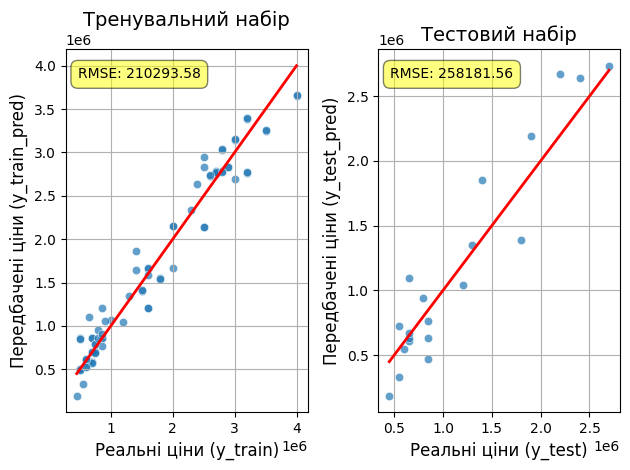

In [113]:
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2)
plt.title('Тренувальний набір', fontsize=14)
plt.xlabel('Реальні ціни (y_train)', fontsize=12)
plt.ylabel('Передбачені ціни (y_train_pred)', fontsize=12)
plt.grid(True)
plt.text(0.05, 0.95, f'RMSE: {rmse_train:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5))

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2)
plt.title('Тестовий набір', fontsize=14)
plt.xlabel('Реальні ціни (y_test)', fontsize=12)
plt.ylabel('Передбачені ціни (y_test_pred)', fontsize=12)
plt.grid(True)
plt.text(0.05, 0.95, f'RMSE: {rmse_test:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', ec='k', lw=1, alpha=0.5))

plt.tight_layout()
plt.show()

Модель може бути перенавченою (overfitting), оскільки RMSE на тестовому наборі (258181.56) значно вищий, ніж на тренувальному (210293.58).

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [114]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(numeric_X_train)
X_test_scaled = scaler.transform(numeric_X_test)

In [115]:
scaler.mean_

array([5.3162500e+01, 2.0183625e+03, 2.8362500e+04, 1.7062500e+01,
       1.9107375e+03, 1.6688750e+02, 5.2250000e+00, 5.1250000e-01,
       6.1250000e-01, 1.0000000e-01, 1.1250000e-01, 1.1250000e-01,
       6.2500000e-02, 7.5000000e-02, 5.0000000e-02, 6.2500000e-02,
       1.1250000e-01, 1.2500000e-01, 1.0000000e-01, 8.7500000e-02,
       6.5000000e-01])

In [116]:
scaler.var_

array([7.99036094e+02, 1.25609375e+00, 8.40810938e+07, 1.16335937e+01,
       4.31270294e+05, 6.62974984e+03, 5.49375000e-01, 2.49843750e-01,
       2.37343750e-01, 9.00000000e-02, 9.98437500e-02, 9.98437500e-02,
       5.85937500e-02, 6.93750000e-02, 4.75000000e-02, 5.85937500e-02,
       9.98437500e-02, 1.09375000e-01, 9.00000000e-02, 7.98437500e-02,
       4.27500000e-01])

In [117]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_X_train.columns, index=numeric_X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_X_test.columns, index=numeric_X_test.index)

In [118]:
X_train_scaled_df.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
55,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
26,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
54,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
19,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303


In [119]:
X_test_scaled_df.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,-1.243932,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303
41,-0.394892,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,3.511885,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742
92,1.409318,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303
14,-1.350062,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135
68,0.560278,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,2.064742


In [120]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled_df, y_train)

LinearRegression()

In [121]:
coefficients = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': model_scaled.coef_
})

In [122]:
coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

In [123]:
coefficients_sorted

,Feature,Coefficient,Abs_Coefficient
5,Power,496769.214899,496769.214899
16,Mercedes,210048.781148,210048.781148
10,BMW,208407.313783,208407.313783
9,Audi,205600.147769,205600.147769
7,fuel_type_codes,-183848.018909,183848.018909
13,Hyundai,-152304.863911,152304.863911
14,Mahindra,-140945.162904,140945.162904
3,Mileage,-131715.512030,131715.512030
11,Ford,-118209.450311,118209.450311
8,transmission_codes,116693.768206,116693.768206


In [124]:
y_train_pred_scaled = model_scaled.predict(X_train_scaled_df)
rmse_train_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_scaled))

y_test_pred_scaled = model_scaled.predict(X_test_scaled_df)
rmse_test_scaled = np.sqrt(mean_squared_error(y_test, y_test_pred_scaled))

print(f"RMSE на тренувальному наборі (після масштабування): {rmse_train_scaled:.2f}")
print(f"RMSE на тестовому наборі (після масштабування): {rmse_test_scaled:.2f}")


RMSE на тренувальному наборі (після масштабування): 210293.58
RMSE на тестовому наборі (після масштабування): 258181.56


**Спостереження**

5 найвпливовіших коефіцієнтів:
1. `Power`: Коефіцієнт = 496769.2149. Логічно, бо вища потужність зазвичай асоціюється з більшою ціною автомобіля.


2. `Mercedes`: Коефіцієнт = 210048.7811
3. `BMW`: Коефіцієнт = 208407.3138
4. `Audi`: Коефіцієнт = 205600.1478
Цілком очікувано, бо на ринку завжди є топ-компанії / топ-заводи які мають податок на бренд.

5. `fuel_type_codes` або `Fuel_Type`: Коефіцієнт = -183848.0189. Мені важко оцінити і визначитись чи логічно це. Для деяких ринків мабуть це доволі логічно, можливо особливо для вторинного ринку.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [125]:
X_train_sm = sm.add_constant(X_train_scaled_df)

In [126]:
model_sm = sm.OLS(y_train, X_train_sm)
results_sm = model_sm.fit()

print(results_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        10:22:00   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

In [127]:
p_values = results_sm.pvalues
coefficients_table = pd.DataFrame({
    'Coefficient': results_sm.params,
    'P-value': p_values
})

In [128]:
coefficients_table

,Coefficient,P-value
const,1.680000e+06,3.734558e-55
Car_ID,5.608685e+03,8.685654e-01
Year,-8.765646e+03,8.860405e-01
Kilometers_Driven,-9.439872e+04,1.525755e-01
Mileage,-1.317155e+05,2.760048e-02
Engine,-2.137745e+04,7.703140e-01
Power,4.967692e+05,1.343837e-08
Seats,-2.148925e+03,9.595569e-01
fuel_type_codes,-1.838480e+05,1.639420e-04
transmission_codes,1.166938e+05,1.022962e-02


In [129]:
alpha = 0.05

X_train_significant = coefficients_table[coefficients_table['P-value'] <= alpha]

In [130]:
X_train_significant

,Coefficient,P-value
const,1.680000e+06,3.734558e-55
Mileage,-1.317155e+05,2.760048e-02
Power,4.967692e+05,1.343837e-08
fuel_type_codes,-1.838480e+05,1.639420e-04
transmission_codes,1.166938e+05,1.022962e-02
Audi,2.056001e+05,7.485851e-09
BMW,2.084073e+05,1.669757e-08
Ford,-1.182095e+05,8.736558e-04
Hyundai,-1.523049e+05,2.204650e-06
Mahindra,-1.409452e+05,1.354686e-05


Статистично значущі ознаки на рівні значущості 0.05:
- Mileage (P-value: 0.0276)
- Power (P-value: 0.0000)
- fuel_type_codes (P-value: 0.0002)
- transmission_codes (P-value: 0.0102)
- Audi (P-value: 0.0000)
- BMW (P-value: 0.0000)
- Ford (P-value: 0.0009)
- Hyundai (P-value: 0.0000)
- Mahindra (P-value: 0.0000)
- Maruti (P-value: 0.0003)
- Mercedes (P-value: 0.0000)
- Volkswagen (P-value: 0.0030)

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [131]:
significant_features = [
    'Mileage', 'Power', 'fuel_type_codes', 'transmission_codes',
    'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti',
    'Mercedes', 'Volkswagen'
]

In [132]:
X_train_significant_sm = X_train_scaled_df[significant_features]

In [133]:
X_train_significant_sm = sm.add_constant(X_train_significant_sm)

In [134]:
model_sm_significant = sm.OLS(y_train, X_train_significant_sm)
results_sm_significant = model_sm_significant.fit()

print(results_sm_significant.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        10:22:00   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78

**Спостереження**

- показник R-squared знизився з 0.959 до 0.951
- показник Adj. R-squared також трохи знизився з 0.945 до 0.943

Як я розумію, то через те що зниження зовсім невелике підтвердило що видалені ознаки не додавали значущої пояснувальної сили, але і не заважали моделі. Модель, що залишилася, все ще пояснює понад 95% дисперсії ціни автомобіля.

Також відмічу, що показник F-statistic трохи збільшився і якщо я правильно розумі, то модель з меншою кількістю, але більш значущих, ознак стала трохи надійнішою і кращою.

І показники AIC, BIC зменшилися, що означає що модель стала ефективнішою за рахунок видалення "шуму".

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [135]:
p_values_all_features = results_sm.pvalues.drop('const')
features_p_lt_0_25 = p_values_all_features[p_values_all_features < 0.25].index.tolist()

In [136]:
print(f"Ознаки з p-value < 0.25:")
print(features_p_lt_0_25)

Ознаки з p-value < 0.25:
['Kilometers_Driven', 'Mileage', 'Power', 'fuel_type_codes', 'transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Volkswagen']


In [137]:
X_train_p_lt_0_25 = X_train_scaled_df[features_p_lt_0_25]
X_train_p_lt_0_25_sm = sm.add_constant(X_train_p_lt_0_25)

In [138]:
model_sm_p_lt_0_25 = sm.OLS(y_train, X_train_p_lt_0_25_sm)
results_sm_p_lt_0_25 = model_sm_p_lt_0_25.fit()

In [139]:
print(results_sm_p_lt_0_25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        10:22:00   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

**Спостереження**

- R-squared (0.958) дуже близький до Моделі 1 (0.959). Це означає, що, пом'якшивши критерій відбору, ми повернули значну частину пояснювальної сили, яку мала модель з усіма ознаками.
- Adj. R-squared (0.948) є найвищим з усіх трьох моделей. Тобто це означає, що, враховуючи кількість значущих ознак, Модель 3 найкраще пояснює дисперсію цільової змінної. Видалені ознаки (ті, що мали p >= 0.25) були зайвими і лише "обтяжували" модель 1.

**Висновок**

На основі отриманих результатів, Модель 3 (з ознаками, де p-value < 0.25) є найкращою.


Добра прогностична сила R-squared (дуже близький до максимального): ми не втратили майже нічого в пояснювальній силі порівняно з моделлю з усіма ознаками, але значно покращили якість моделі в цілому.

Найвищий Adj. R-squared вказує на те, що Модель 3 забезпечує найкраще пояснення дисперсії цільової змінної, враховуючи кількість предикторів. Це свідчить про ефективний відбір ознак.

Значне покращення F-статистики: Порівняно з повною моделлю, Модель 3 є значно сильнішою в поясненні даних.

Найнижчий AIC: є сильним доказом того, що Модель 3 є найбільш збалансованою з точки зору точності та простоти, що є дуже бажаною характеристикою.